30.14810571687332 30.101817608335864 Hybrid/Ref Sus 0.6
10.403541732522301 9.96828599233877 Hybrid/Ref Sus 0.9
159.16415844840483 159.1540955508591 Hybrid/Ref Inf 0.6
154.96386999472958 155.30880648349887 Hybrid/Ref Inf 0.9
34.002987415065114 33.86408684080123  Hybrid/Ref :Rec 0.6
57.97595501322382 57.84290752415649 Hybrid/Ref Rec 0.9


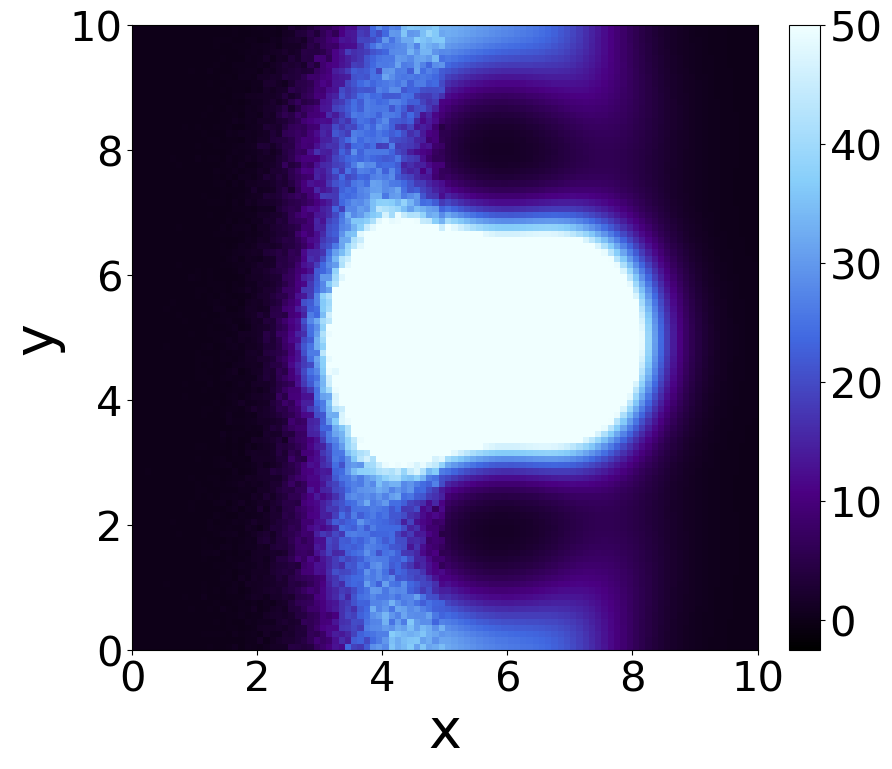

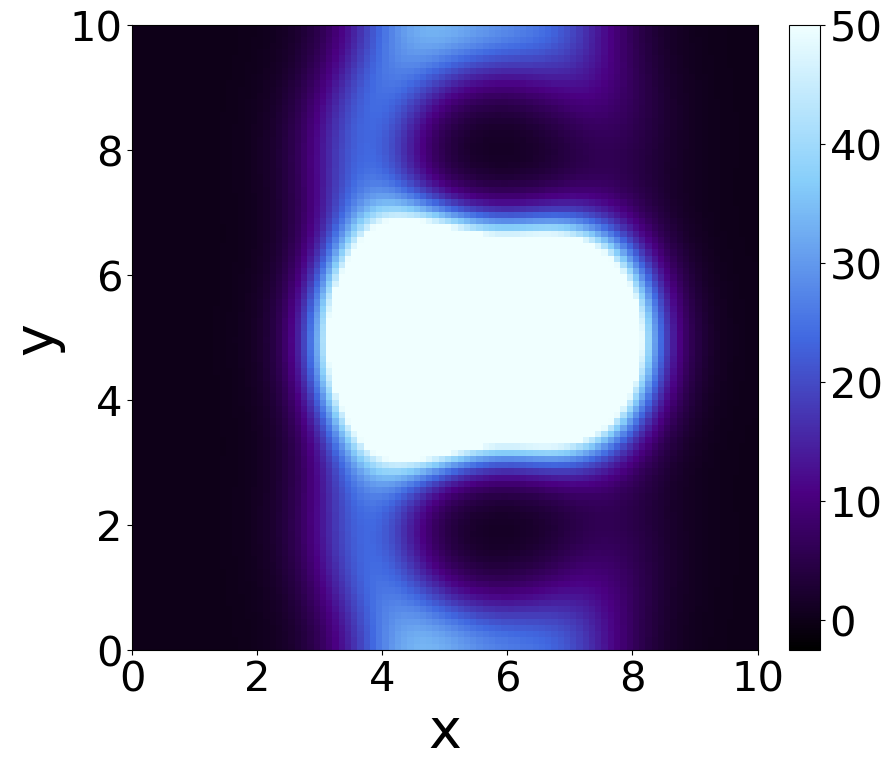

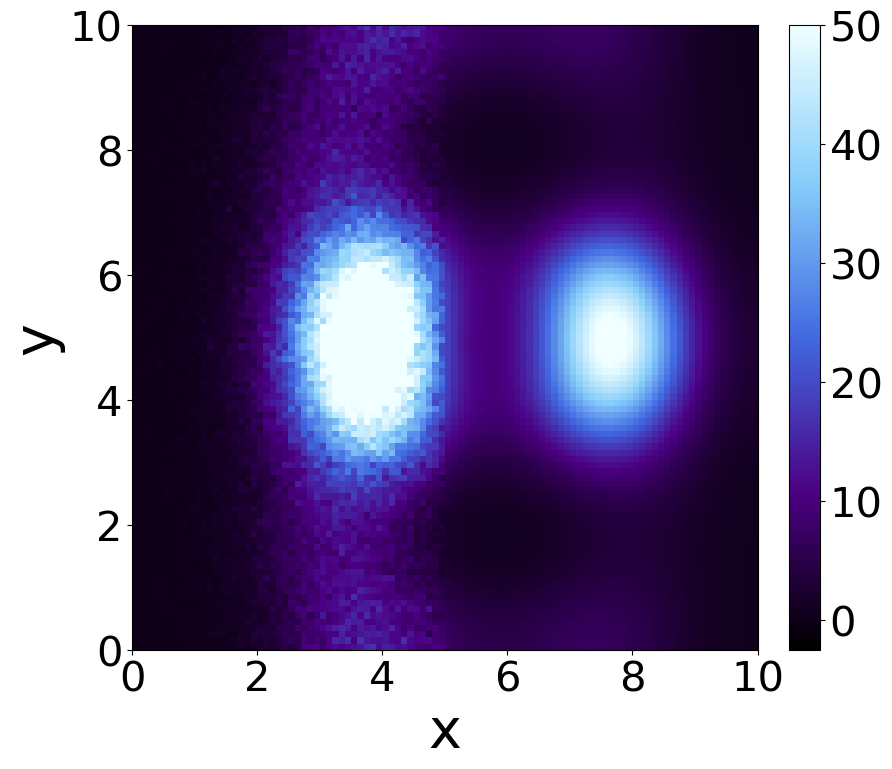

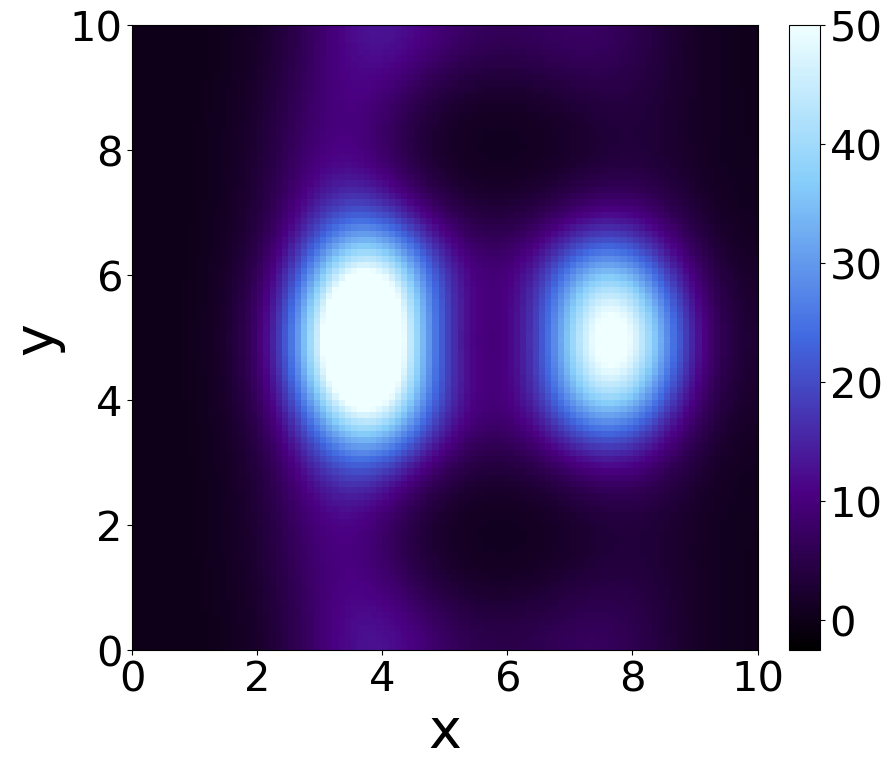

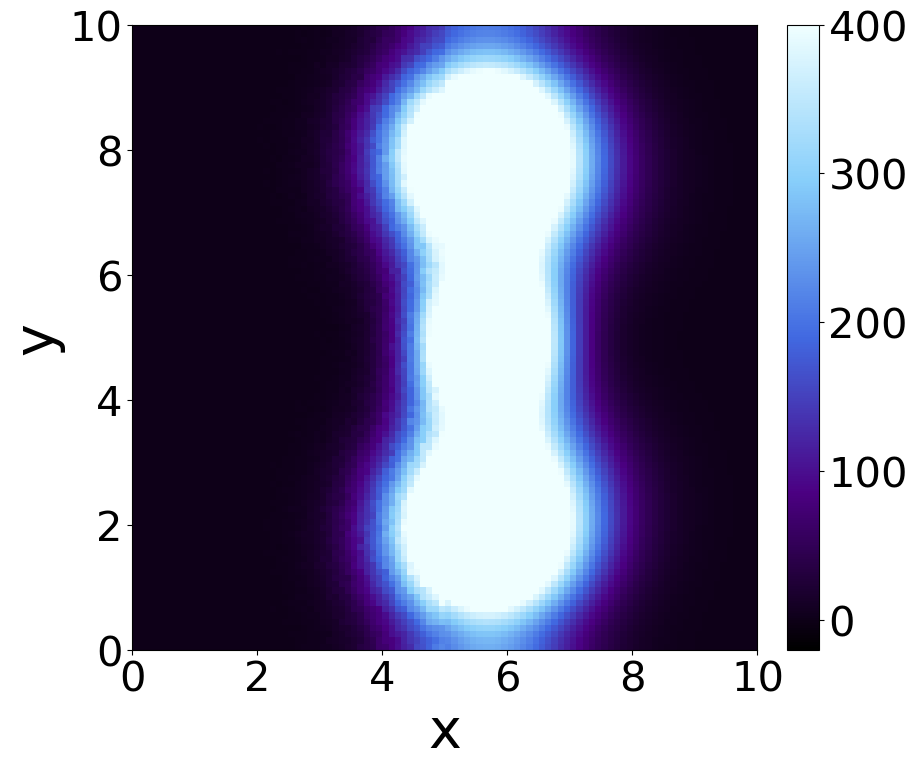

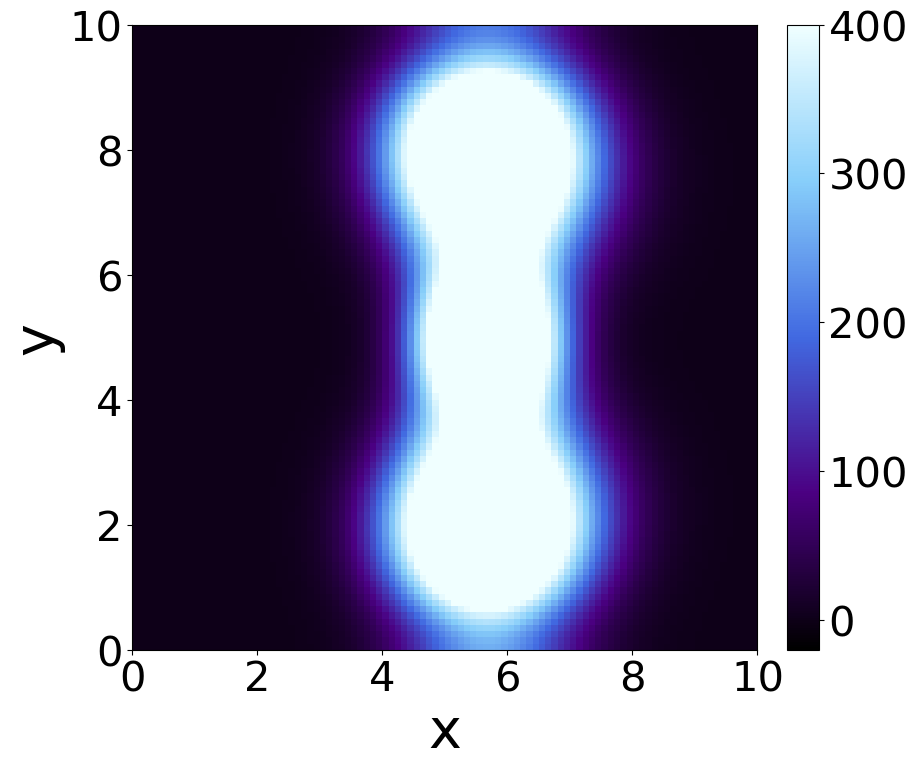

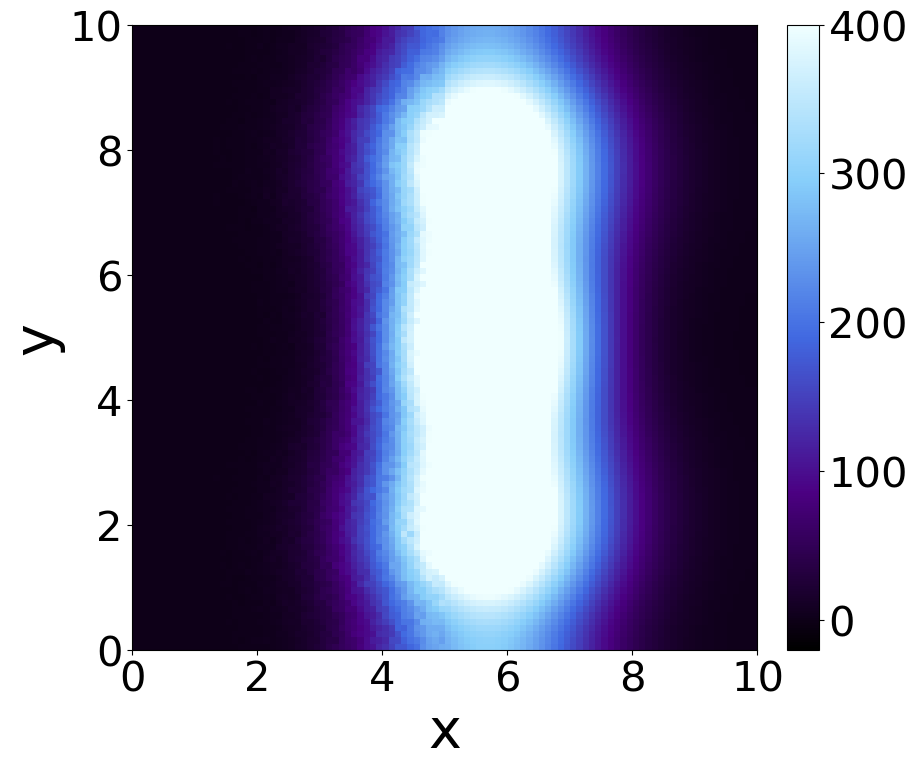

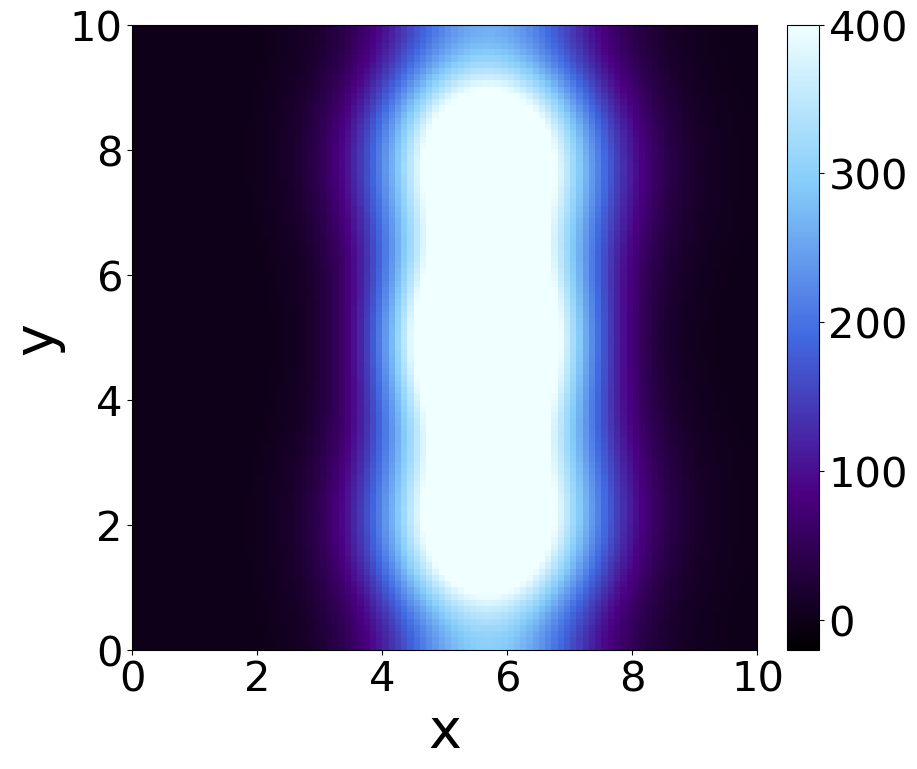

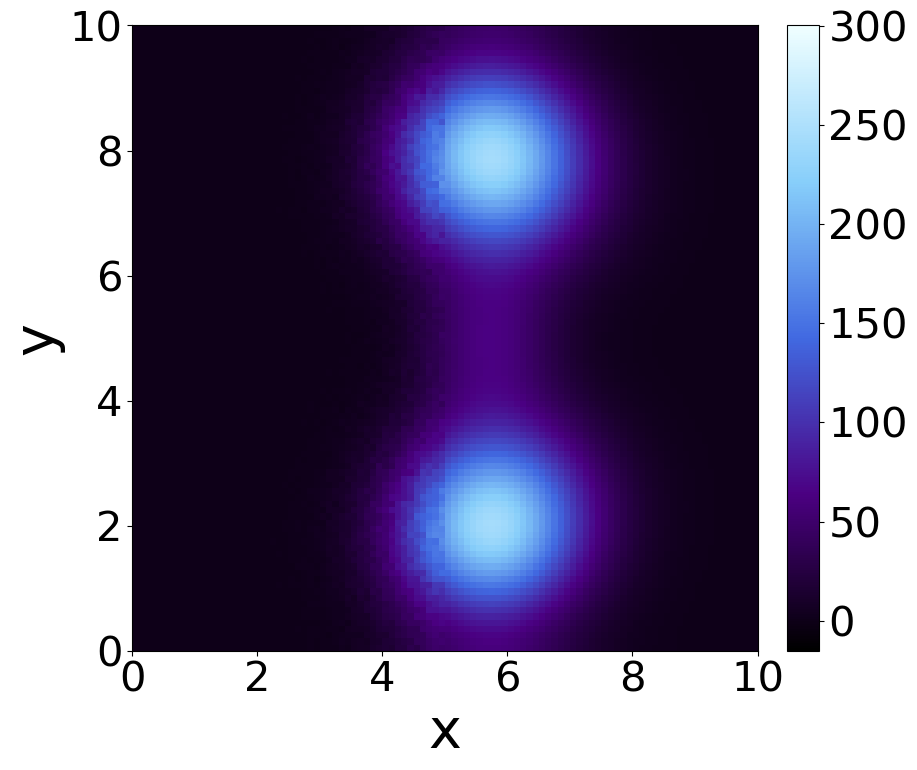

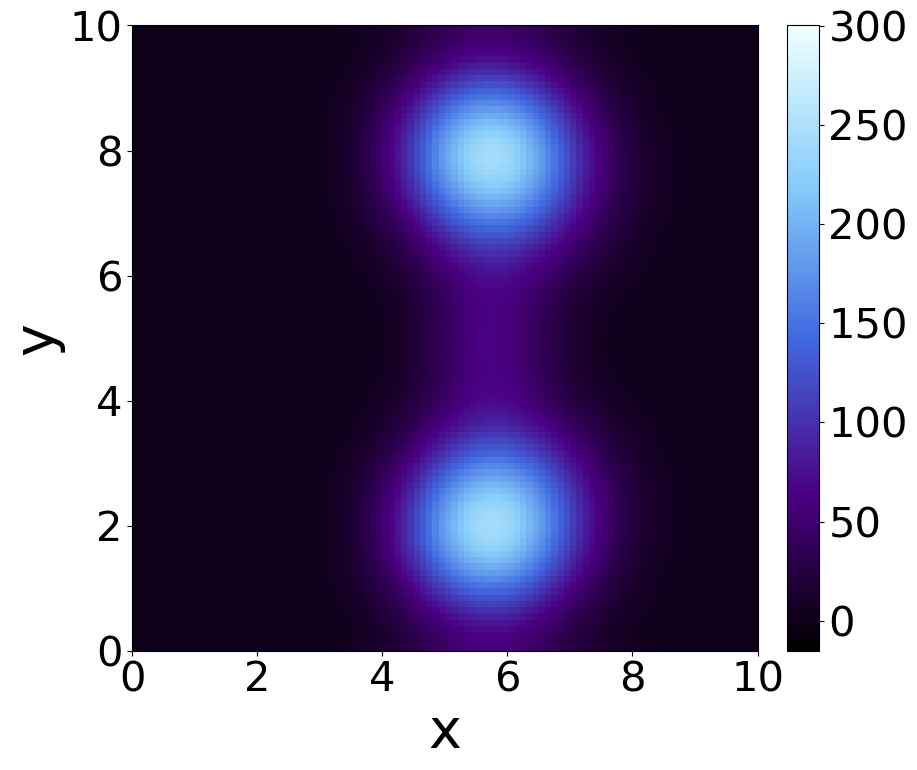

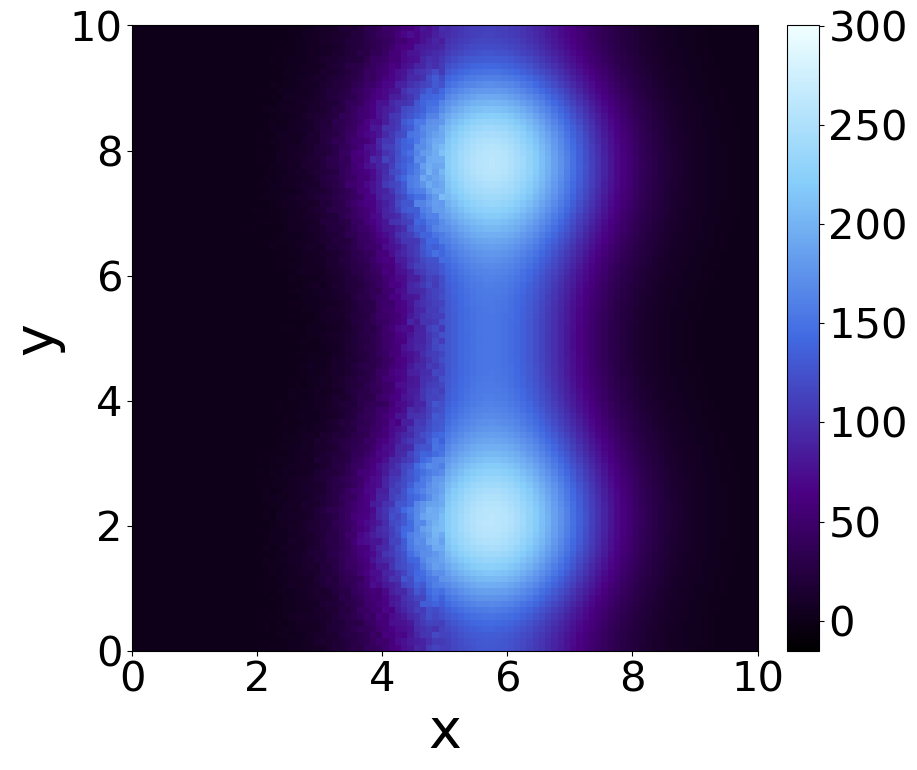

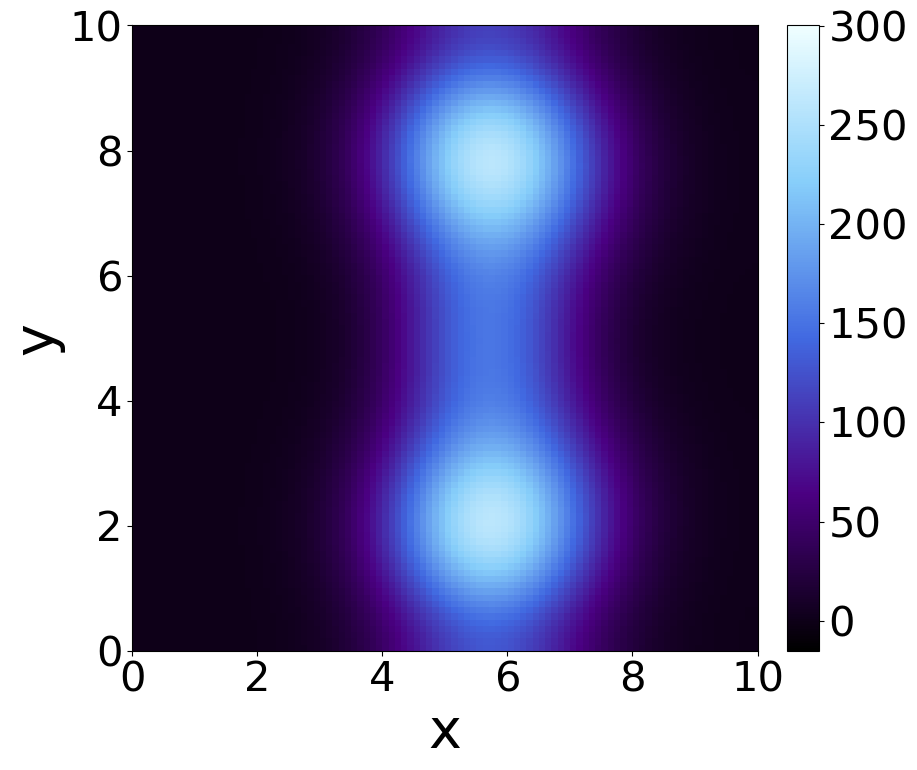

In [4]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 30 12:11:01 2019

@author: bzfkostr
"""

from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from ParametersB_SIR import *

DiscreteSusAverage = np.load('./Solutions/SusAverageTauBTest.npy')
DiscreteInfAverage = np.load('./Solutions/InfAverageTauBTest.npy')
DiscreteRecAverage = np.load('./Solutions/RecAverageTauBTest.npy')

ReferenceSus = np.load('./Solutions/FDSIR1_B.npy')
ReferenceInf = np.load('./Solutions/FDSIR2_B.npy')
ReferenceRec = np.load('./Solutions/FDSIR3_B.npy')

ts=0.1
constant=int(ts/deltat)
timesteps_cut=int(deltat*(timesteps-1)/ts)

def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
    constant=int(ts/deltat)
    Hmean=np.zeros(timesteps_cut)
    Cmean=np.zeros(timesteps_cut)
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Average_t = np.transpose(Average[t])  # get reservoir
        Ref_t=Reference[(t+1)*constant]
       
        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling,l_coupling))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
            
            for j in range(int(l_coupling / 2)):
                
                Particle[i,j+int(l_coupling/2)]=Ref_t[i,j+int(l_coupling/2)]
        listH.append(Particle)
            
        # average
        Hmean[t]=np.mean(Particle)
            
         
    for t in range(timesteps_cut):
        Ref_t=Reference[(t+1)*constant]

        Cmean[t]=np.mean(Ref_t)
        listR.append(Ref_t)

    return Hmean, Cmean, listH, listR


#%%

# Define the custom colormap with specified colors
colors1 = ['black','indigo', 'royalblue', 'lightskyblue', 'azure']
n_bins1 = 256  # Number of bins for the colormap

# Create the colormap
custom_colormap1 = LinearSegmentedColormap.from_list('custom_colormap', colors1, N=n_bins1)


#%% Plot for Susceptible

sus_mean, RefS, HybridSus, ReferenceSus = HybridPlot(DiscreteSusAverage, ReferenceSus, l_coupling)
inf_mean, RefI,  HybridInf, ReferenceInf= HybridPlot(DiscreteInfAverage,  ReferenceInf, l_coupling)
rec_mean, RefR,  HybridRec, ReferenceRec = HybridPlot(DiscreteRecAverage, ReferenceRec, l_coupling)


def functionplot(Data, Max, Name):
    '''
    Creates and saves plots.
    Data=Hybrid or reference solution
    Max=Maximum plotting value
    Time=time-step
    Name=name of figure
    '''

    fig = plt.figure(figsize=(9.3, 7.8))  # Match figure size
    plt.imshow(Data, interpolation='nearest', cmap=custom_colormap1, extent=[0, a, 0, a])
    ax = plt.gca()
    cbar = plt.colorbar(fraction=0.045, pad=0.04)  # Adjust padding to make colorbar smaller
    ax.tick_params(labelsize=30)
    cbar.ax.tick_params(labelsize=30)
    plt.xlabel('x', fontsize=40)
    plt.ylabel('y', fontsize=40)
    plt.clim(-Max / 20, Max)
    plt.tight_layout()
    #plt.show()  # Display the plot interactively
    plt.savefig('./Plots/TauTest/SIR_Tau' + str(Name) + '.png') 

#%% For other points to compare


'''Create Plots'''

TimeSteps=[0,5,8]

MaxPlot=[50,400,300]


functionplot(HybridSus[TimeSteps[1]], MaxPlot[0], 'HybridSus'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))
functionplot(ReferenceSus[TimeSteps[1]], MaxPlot[0], 'ReferenceSus'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))

print(np.mean(HybridSus[TimeSteps[1]]), 
      np.mean(ReferenceSus[TimeSteps[1]]), 
      'Hybrid/Ref Sus', 
      str(np.round((TimeSteps[1] + 1) * constant * deltat, 2)))

functionplot(HybridSus[TimeSteps[2]], MaxPlot[0], 'HybridSus'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))
functionplot(ReferenceSus[TimeSteps[2]], MaxPlot[0], 'ReferenceSus'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))

print(np.mean(HybridSus[TimeSteps[2]]), 
      np.mean(ReferenceSus[TimeSteps[2]]), 
      'Hybrid/Ref Sus', 
      str(np.round((TimeSteps[2] + 1) * constant * deltat, 2)))

# %% Plot for Infected

functionplot(HybridInf[TimeSteps[1]],  MaxPlot[1], 'HybridInf'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))
functionplot(ReferenceInf[TimeSteps[1]],  MaxPlot[1], 'ReferenceInf'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))
print(np.mean(HybridInf[TimeSteps[1]]), 
      np.mean(ReferenceInf[TimeSteps[1]]), 
      'Hybrid/Ref Inf', 
      str(np.round((TimeSteps[1] + 1) * constant * deltat, 2)))

functionplot(HybridInf[TimeSteps[2]],  MaxPlot[1], 'HybridInf'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))
functionplot(ReferenceInf[TimeSteps[2]],  MaxPlot[1], 'ReferenceInf'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))

print(np.mean(HybridInf[TimeSteps[2]]), 
      np.mean(ReferenceInf[TimeSteps[2]]), 
      'Hybrid/Ref Inf', 
      str(np.round((TimeSteps[2] + 1) * constant * deltat, 2)))


# %% Plot for Recovered


functionplot(HybridRec[TimeSteps[1]], MaxPlot[2], 'HybridRec'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))
functionplot(ReferenceRec[TimeSteps[1]], MaxPlot[2], 'ReferenceRec'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))
print(np.mean(HybridRec[TimeSteps[1]]), 
      np.mean(ReferenceRec[TimeSteps[1]]), 
      ' Hybrid/Ref :Rec', 
      str(np.round((TimeSteps[1] + 1) * constant * deltat, 2)))

functionplot(HybridRec[TimeSteps[2]], MaxPlot[2], 'HybridRec'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))
functionplot(ReferenceRec[TimeSteps[2]], MaxPlot[2], 'ReferenceRec'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))
print(np.mean(HybridRec[TimeSteps[2]]), 
      np.mean(ReferenceRec[TimeSteps[2]]), 
      'Hybrid/Ref Rec', 
      str(np.round((TimeSteps[2] + 1) * constant * deltat, 2)))


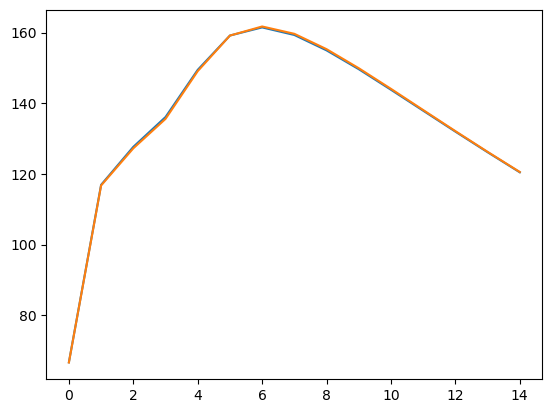

In [5]:
H=np.zeros(15)
R=np.zeros(15)
for t in range(15):
    
    H[t]=np.mean(HybridInf[t])
    R[t]= np.mean(ReferenceInf[t])
fig=plt.figure()
plt.plot(H)
plt.plot(R)